<a href="https://colab.research.google.com/github/BardofCode/BardofCode/blob/main/Credit_Card_Fraud(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
files.upload()  # Select kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debarghapaul","key":"1af03f84f0da2a3217d2ef05c1bd25a3"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
# Shape of the data
print(df.shape)

(284807, 31)


In [ ]:
# First few rows
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Basic summary statistics
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Check data types
print(df.dtypes)

# Convert 'Time' to a more interpretable format (if needed)
# In this dataset, 'Time' represents seconds since the first transaction, so no conversion is strictly necessary.


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Class
0    284315
1       492
Name: count, dtype: int64


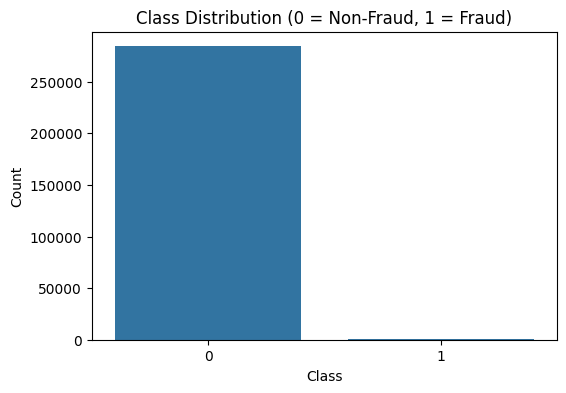

In [ ]:
# Count the instances of each class
class_counts = df['Class'].value_counts()
print(class_counts)

# Plot the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the 'Amount' column
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# Drop the original 'Amount' column if desired
df.drop(columns=['Amount'], inplace=True)

In [ ]:
# Check the first few rows and summary
print(df.head())
print(df.describe())

# Check the data types to ensure everything is as expected
print(df.dtypes)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

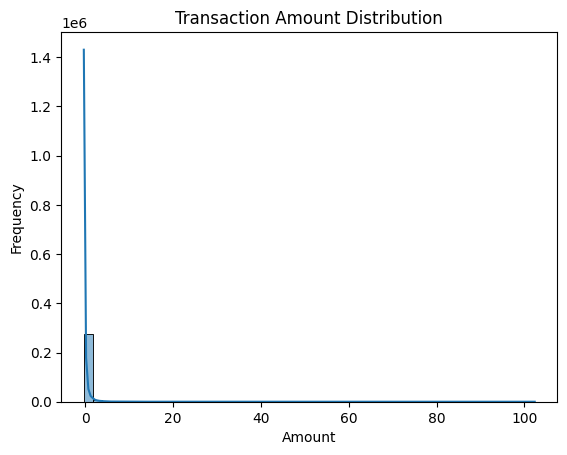

In [ ]:
sns.histplot(df['Amount_Scaled'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

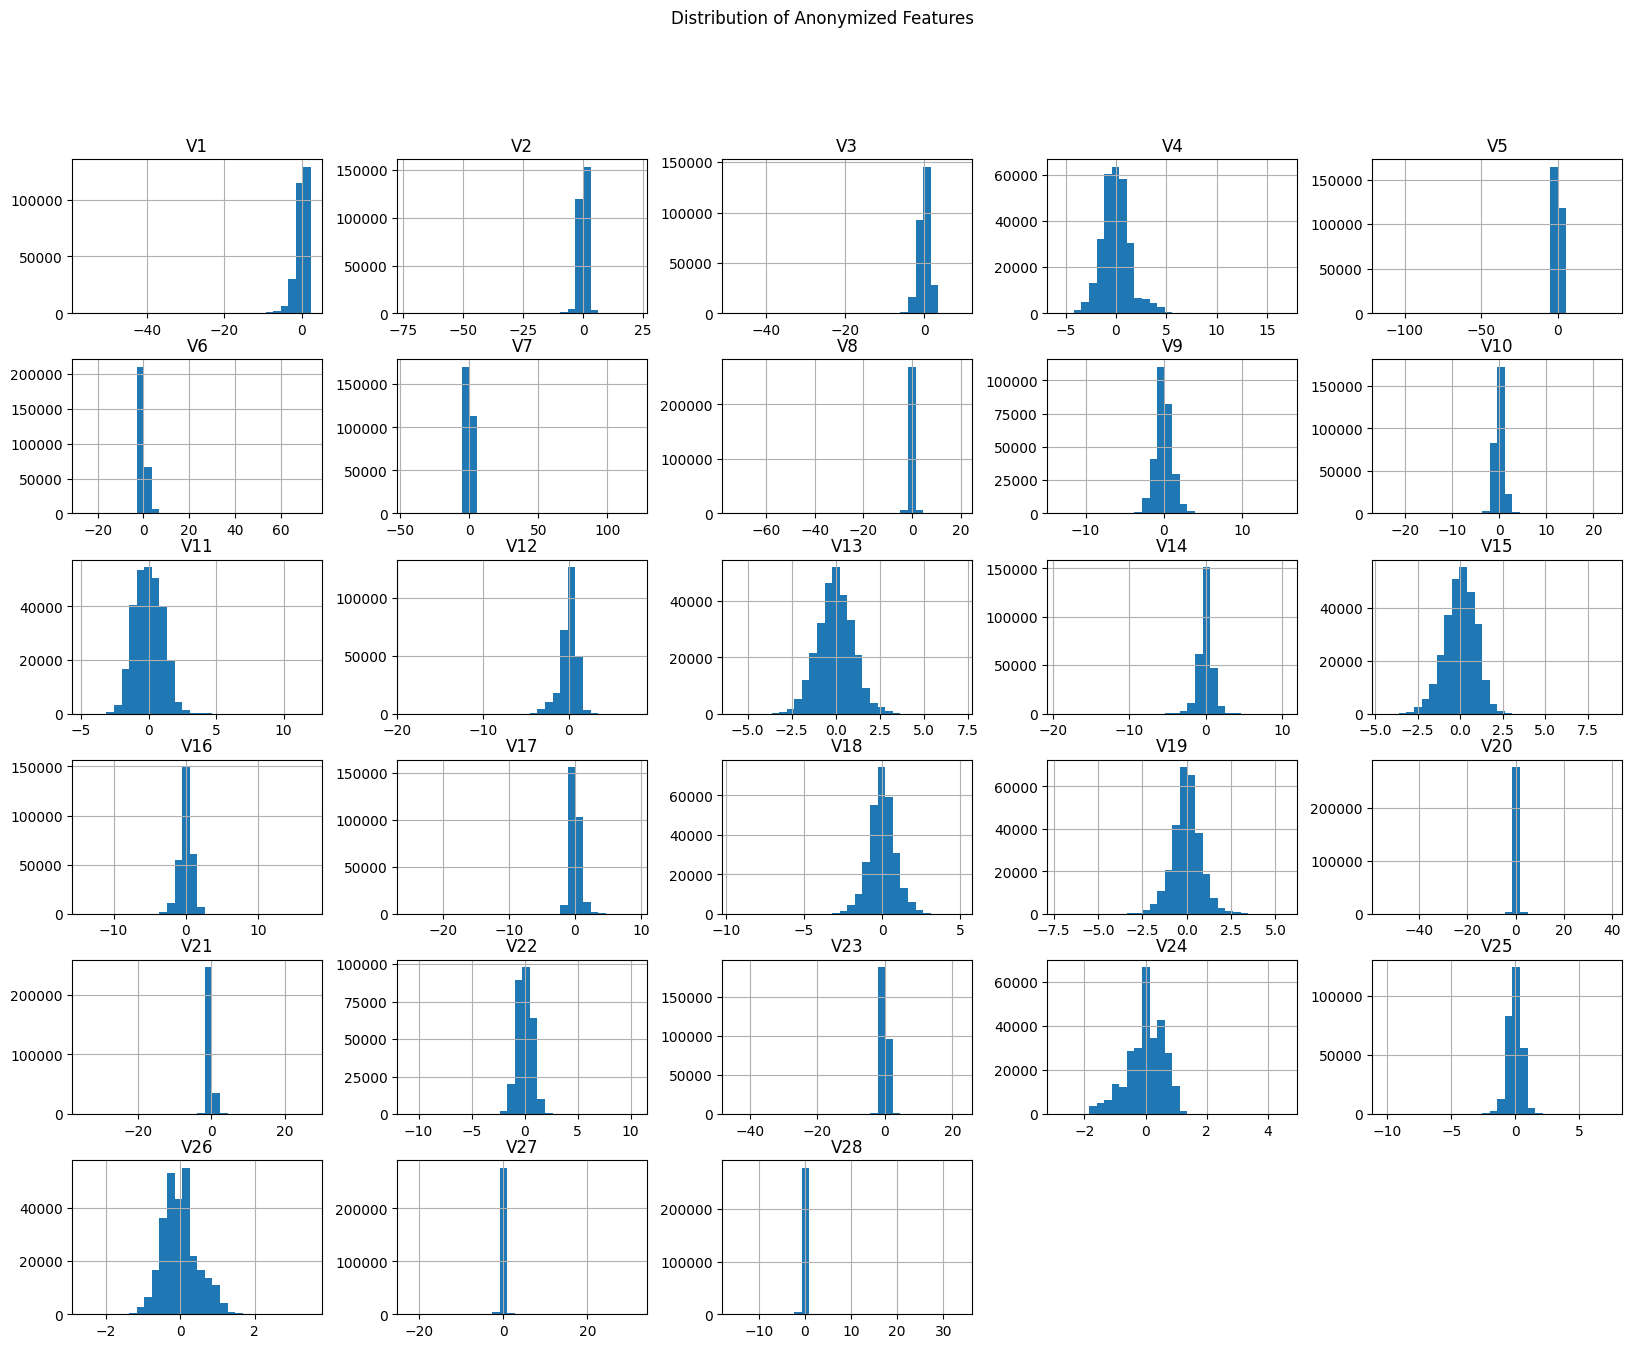

In [ ]:
df.iloc[:, 1:29].hist(figsize=(20, 15), bins=30)
plt.suptitle('Distribution of Anonymized Features')
plt.show()

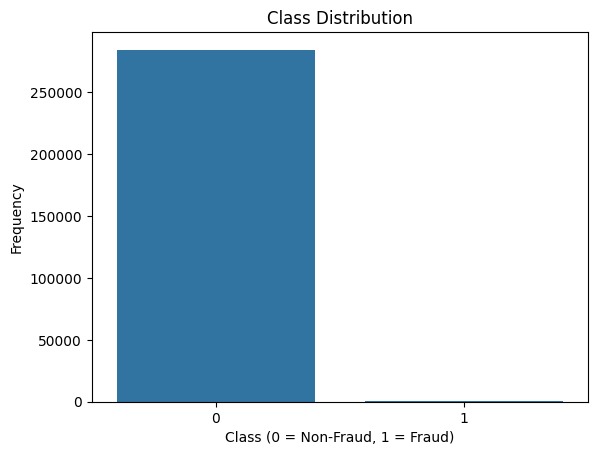

In [ ]:
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Frequency')
plt.show()

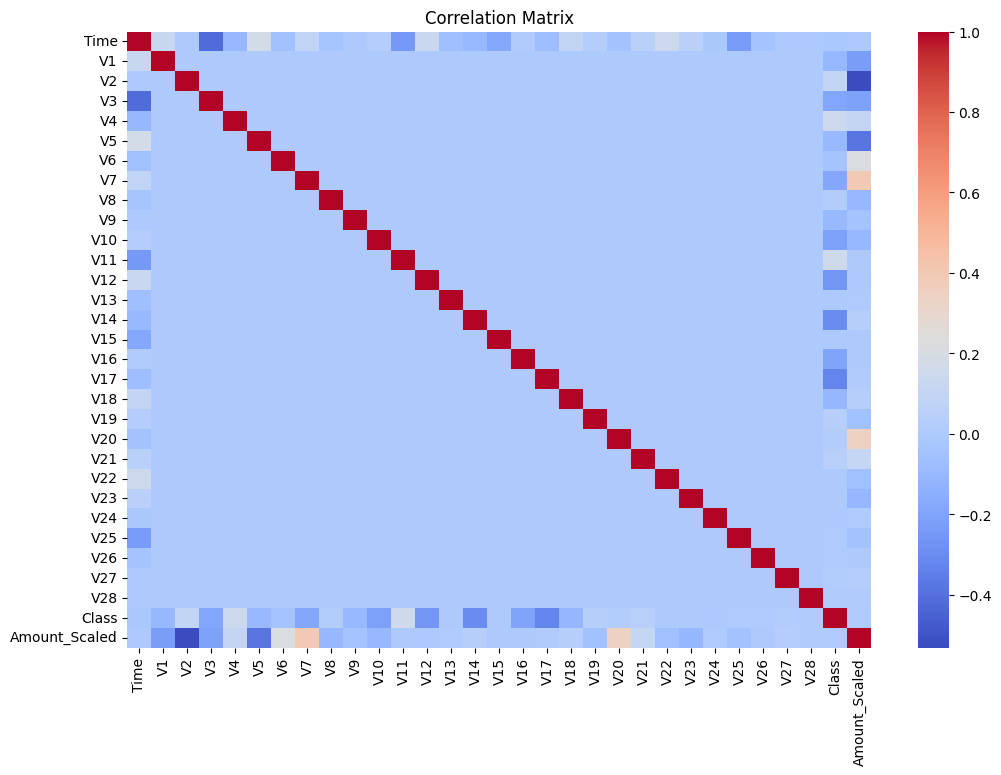

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

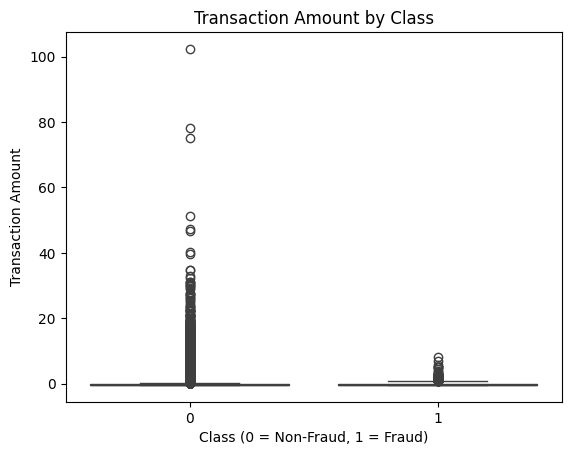

In [ ]:
sns.boxplot(x='Class', y='Amount_Scaled', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

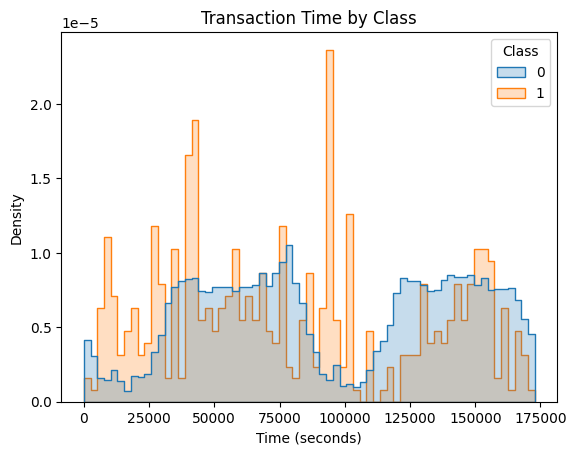

In [ ]:
sns.histplot(data=df, x='Time', hue='Class', element='step', stat='density', common_norm=False)
plt.title('Transaction Time by Class')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.show()

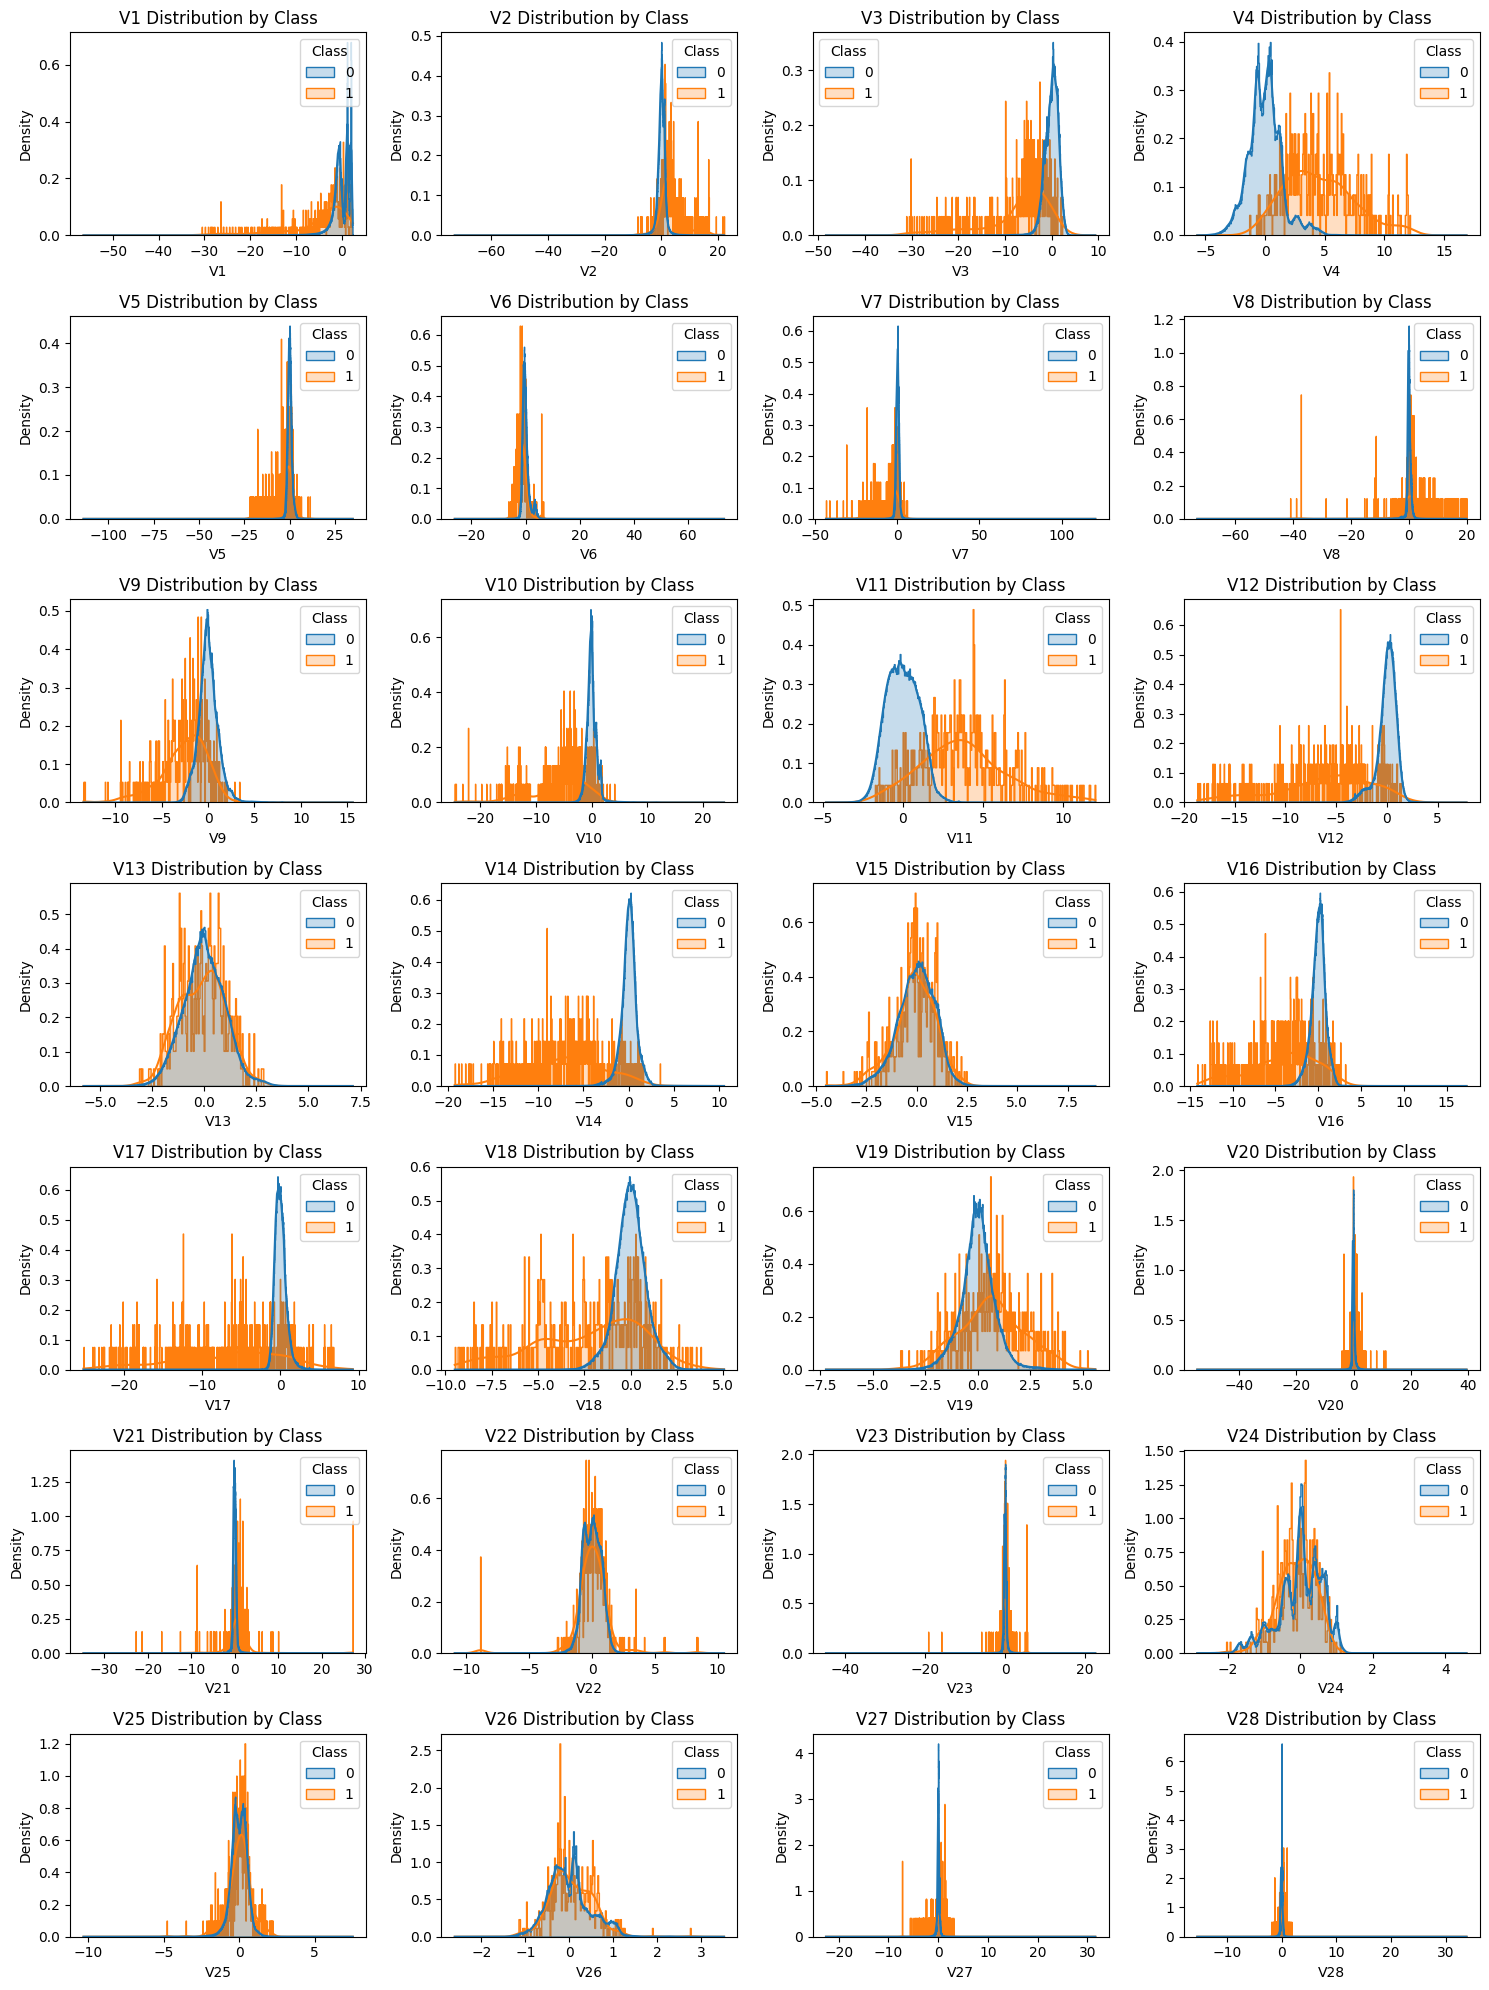

In [ ]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(df.columns[1:29], 1):
    plt.subplot(7, 4, i)
    sns.histplot(data=df, x=col, hue='Class', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'{col} Distribution by Class')
plt.tight_layout()
plt.show()

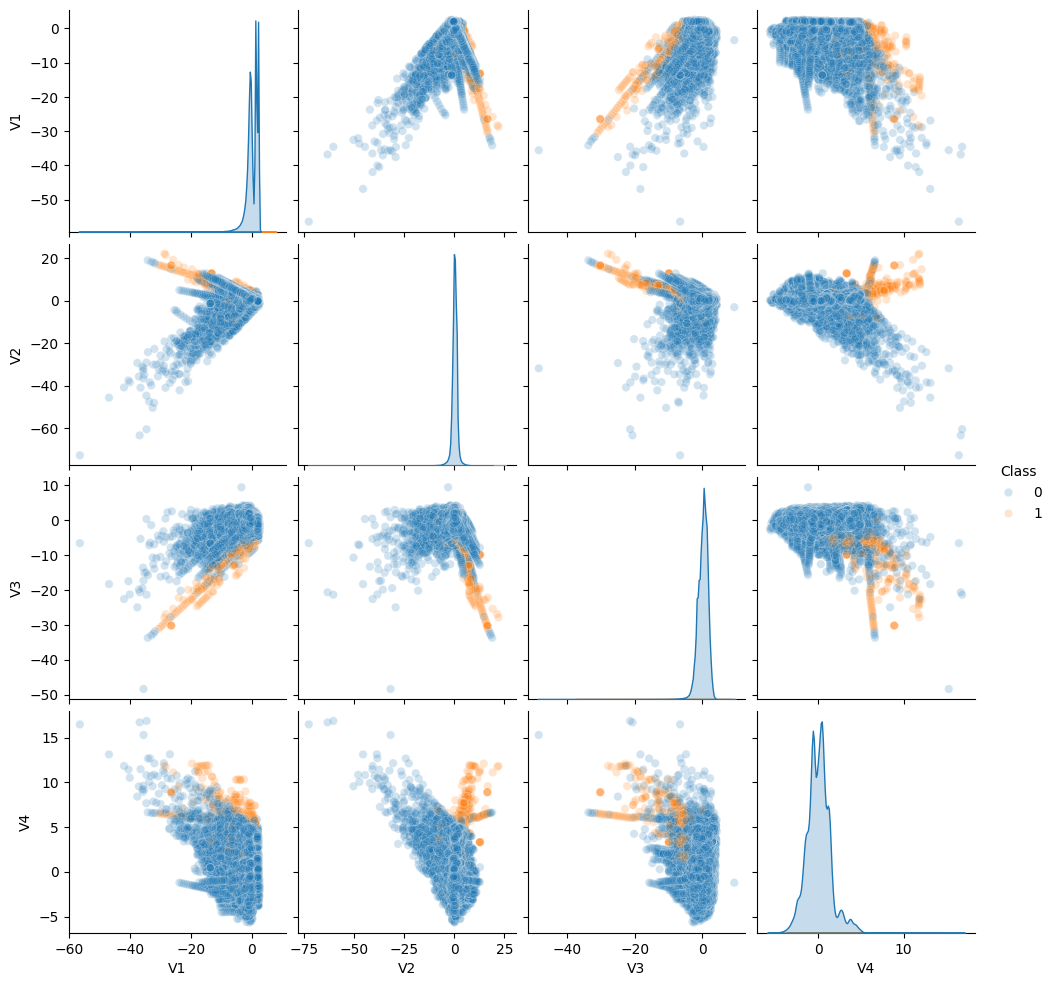

In [ ]:
sns.pairplot(df, vars=['V1', 'V2', 'V3', 'V4'], hue='Class', plot_kws={'alpha':0.2})
plt.show()

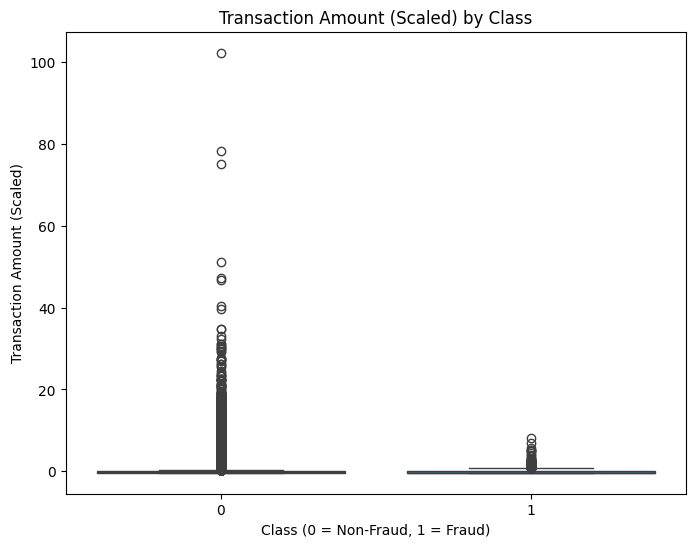

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare transaction amounts for fraud (Class = 1) and non-fraud (Class = 0)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount_Scaled', data=df)
plt.title('Transaction Amount (Scaled) by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount (Scaled)')
plt.show()

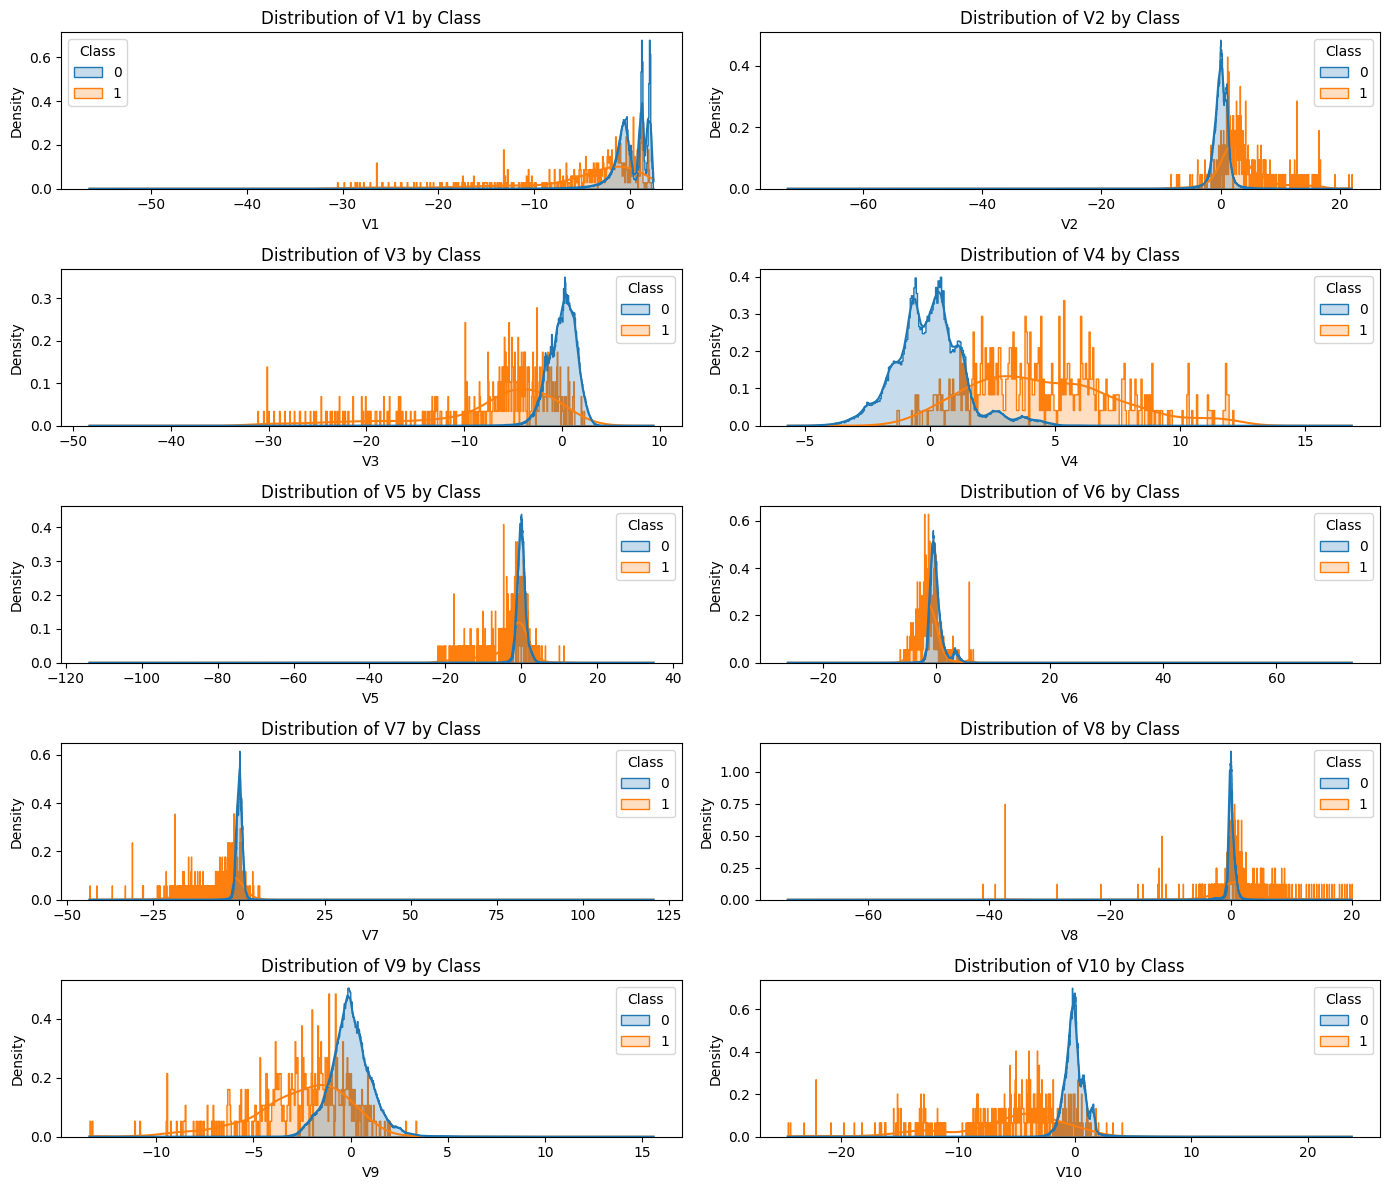

In [ ]:
# Plot histograms for selected features by class
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']

plt.figure(figsize=(14, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=feature, hue='Class', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

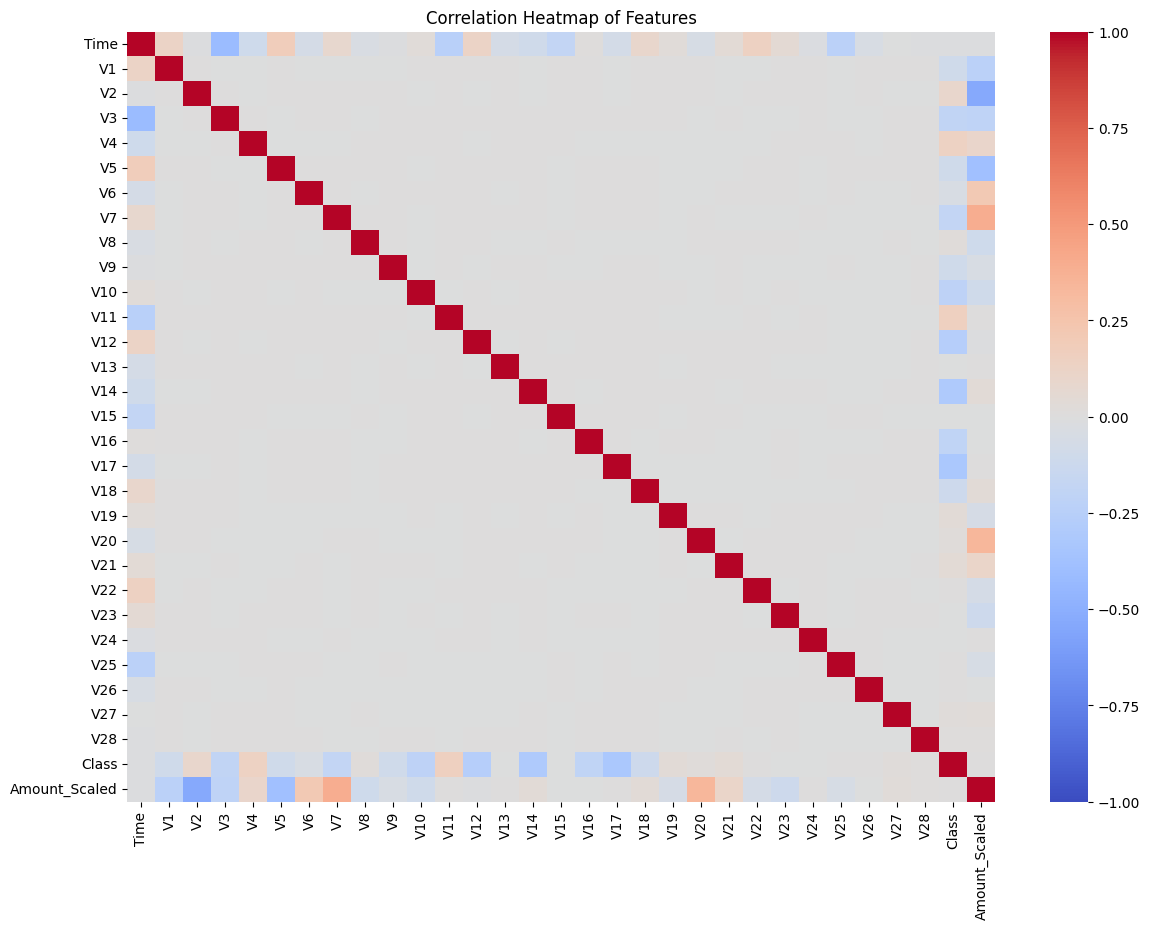

In [ ]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

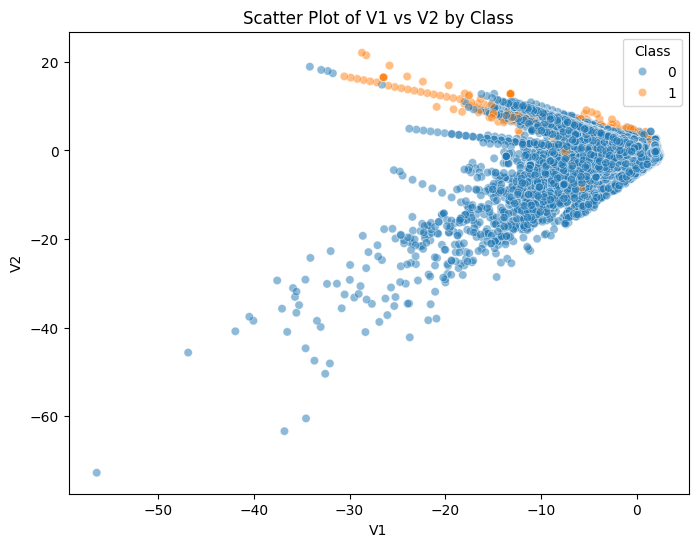

In [ ]:
# Scatter plot of two features by Class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df, alpha=0.5)
plt.title('Scatter Plot of V1 vs V2 by Class')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()